<h1>Basic EDA :bar_chart:</h1>

<h2>1. Introduction to our data (see README for more information about dataset) :rocket:</h2>

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

df = pd.read_csv('train_FD001.txt', delim_whitespace=True, header=None)
df.columns = ['engine_id', 'cycle_time', 'operational_setting_1',
            'operational_setting_2', 'operational_setting_3', 'sensor_measurement_1',
            'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4',
            'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7',
            'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10',
            'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13',
            'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16',
            'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19',
            'sensor_measurement_20', 'sensor_measurement_21']
print(df.head())
print("- - - - - - - - - - - - - -")
print(df.shape)
print("- - - - - - - - - - - - - -")
print(df.dtypes)

   engine_id  cycle_time  operational_setting_1  operational_setting_2  operational_setting_3  sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  sensor_measurement_21
0          1           1                -0.0007                -0.0004                  100.0                518.67                641.82               1589.70               1400.60                 14.62  ...                 521.66                2388.02                8138.62                 8.4195                   0.03                    392                   2388                  100.0                  39.06                23.4190
1          1           2                 0.0019                -0.0003                  100.0                518.67       

<h2>2. Check if we need to fix missing or duplicate data :recycle:<h2>

In [2]:
print(df.duplicated().sum())
print("- - - - - - - - - - - - - -")
print(df.isnull().sum())
print("- - - - - - - - - - - - - -")
print(df.count())

0
- - - - - - - - - - - - - -
engine_id                0
cycle_time               0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64
- - - - - - - - - - - - - -
engine_id                20631
cycle_time               20631
operational_setting_1    20631
operational_setting_2    20631
operational_setting_3    20631
sensor_measurement_1     20631
sensor_measurement_2     20631
sensor_mea

<h2>3. Adding anomalies and plotting them :space_invader:<h2>

is_anomaly
False    18614
True      2017
Name: count, dtype: int64


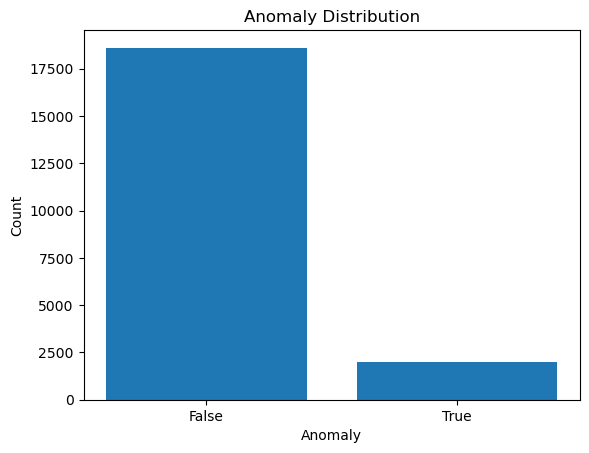

In [64]:
df['is_anomaly'] = False

for engine_id in df['engine_id'].unique():
    engine_data = df[df['engine_id'] == engine_id]
    ten_percent = int(len(engine_data) * 0.10)
    if ten_percent == 0:
        ten_percent = 1
    last_cycles = engine_data.tail(ten_percent).index
    df.loc[last_cycles, 'is_anomaly'] = True

print(df['is_anomaly'].value_counts())
# Let's plot a bar chart of true and false anomalies using matplotlib only
import matplotlib.pyplot as plt

plt.bar(df['is_anomaly'].value_counts().index, df['is_anomaly'].value_counts())
plt.xticks([0, 1], ['False', 'True'])
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.title('Anomaly Distribution')
plt.show()

<h2>4. Distributions plots :arrow_upper_right:</h2>

C:\Users\USER\AppData\Local\Temp\ipykernel_8276\1769128495.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot([df[col] for col in op_cols], labels=op_cols, showfliers=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_8276\1769128495.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([df[col] for col in sensor_cols], labels=sensor_cols, showfliers=False)


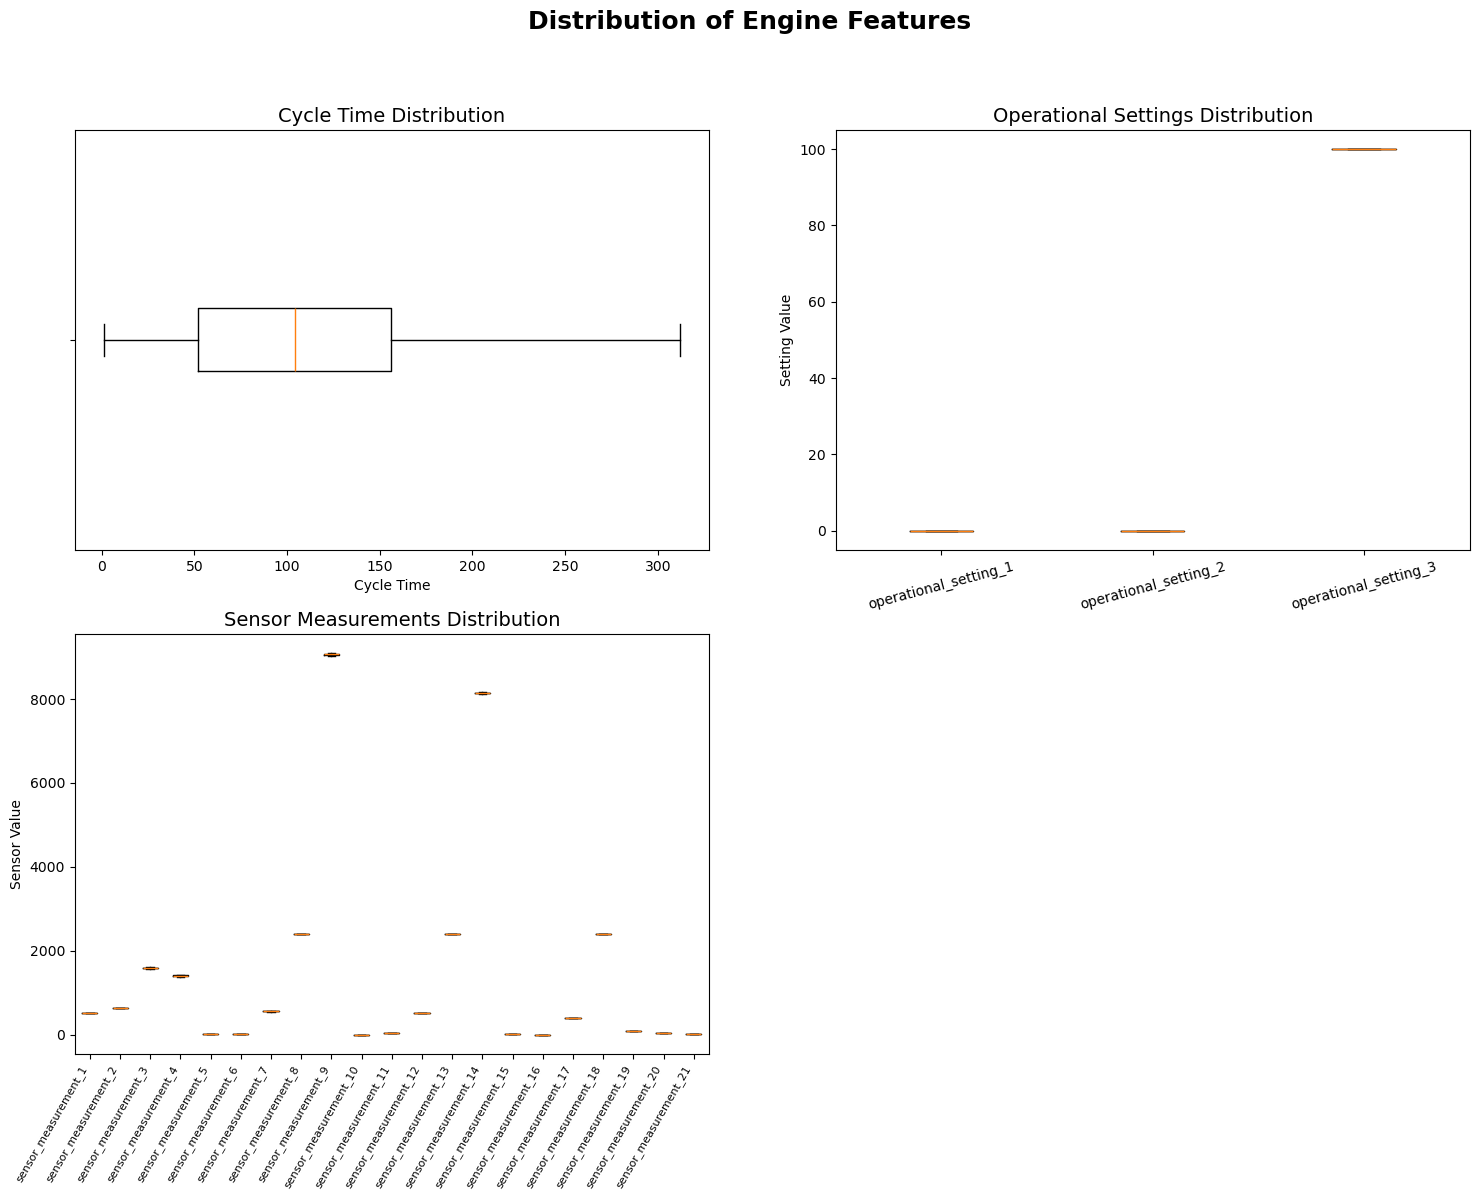

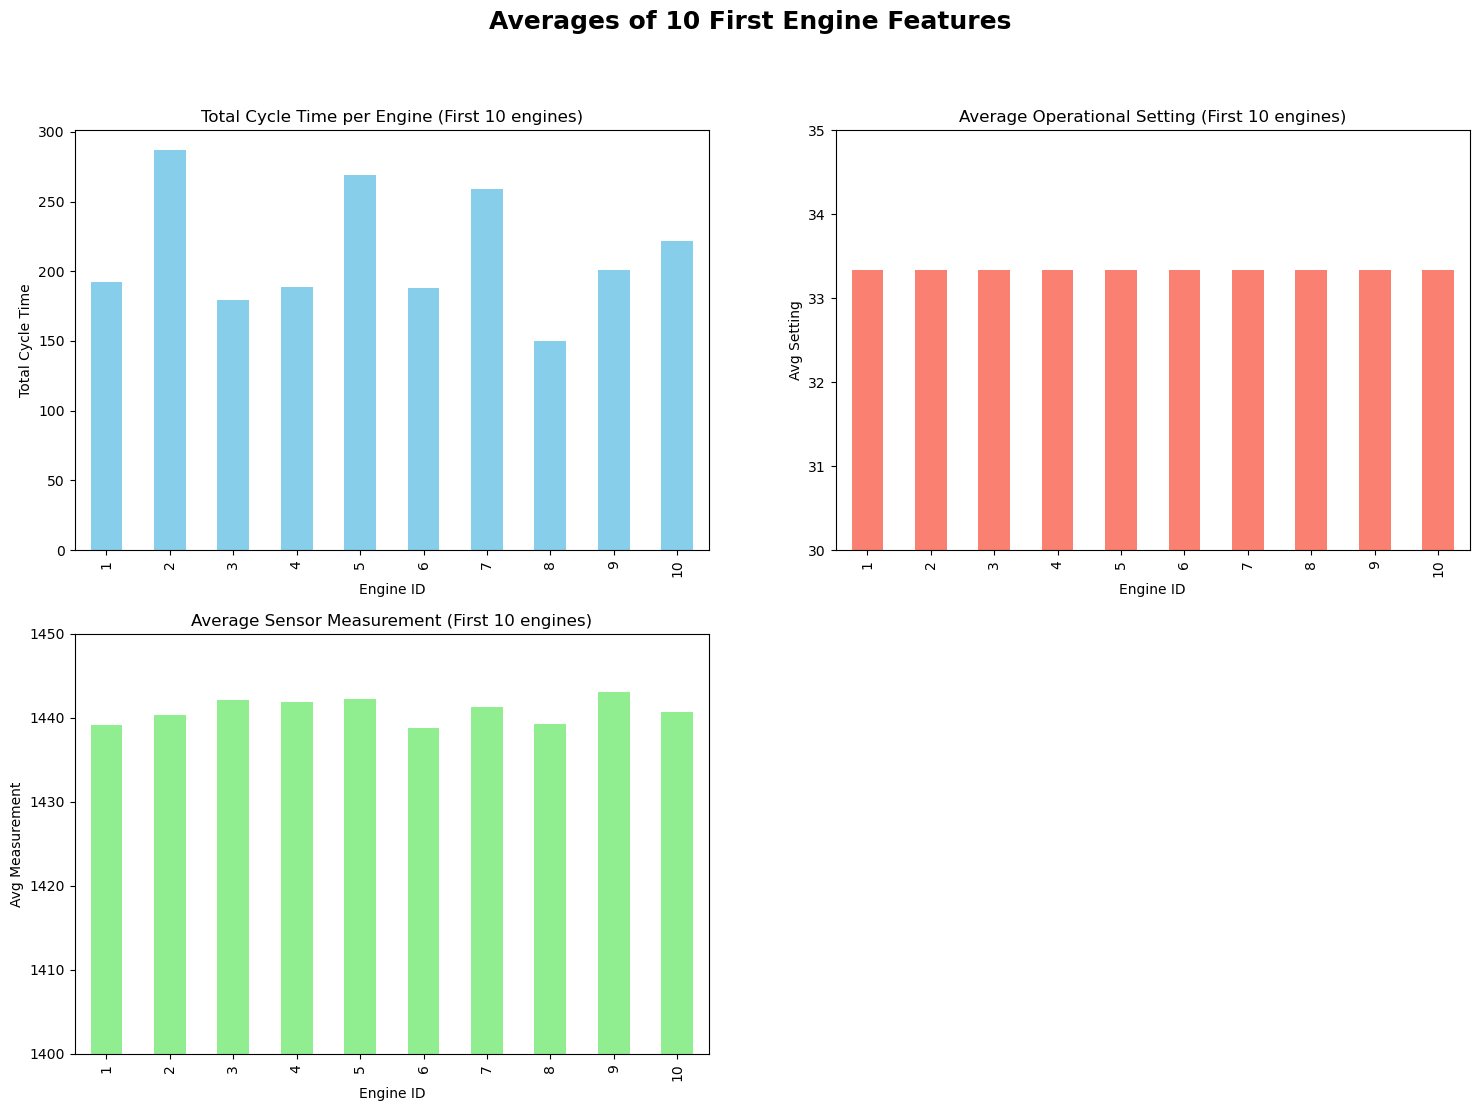

In [59]:
# Show there are lots of different values ig 
# Distribution of operational settings

#Add a new column average operation setting on dataframe
df['avg_operational_setting'] = df[['operational_setting_1', 'operational_setting_2', 'operational_setting_3']].mean(axis=1)
#Add a new column average sensor measurement on dataframe
df['avg_sensor_measurement'] = df[['sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20', 'sensor_measurement_21']].mean(axis=1)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Engine Features', fontsize=18, fontweight='bold')

# 1. Cycle Time (horizontal boxplot)
axes[0, 0].boxplot(df['cycle_time'], vert=False, showfliers=False)
axes[0, 0].set_title('Cycle Time Distribution', fontsize=14)
axes[0, 0].set_xlabel('Cycle Time')
axes[0, 0].set_yticklabels([])  # Hide y-tick labels as there is only one box

# 2. Operational Settings
op_cols = ['operational_setting_1', 'operational_setting_2', 'operational_setting_3']
axes[0, 1].boxplot([df[col] for col in op_cols], labels=op_cols, showfliers=False)
axes[0, 1].set_title('Operational Settings Distribution', fontsize=14)
axes[0, 1].set_ylabel('Setting Value')
axes[0, 1].tick_params(axis='x', rotation=15)

# 3. Sensor Measurements (21 sensors)
sensor_cols = [f'sensor_measurement_{i}' for i in range(1, 22)]
axes[1, 0].boxplot([df[col] for col in sensor_cols], labels=sensor_cols, showfliers=False)
axes[1, 0].set_title('Sensor Measurements Distribution', fontsize=14)
axes[1, 0].set_ylabel('Sensor Value')
axes[1, 0].tick_params(axis='x', rotation=60, labelsize=8)
for label in axes[1, 0].get_xticklabels():
    label.set_horizontalalignment('right')

# Remove empty subplot
fig.delaxes(axes[1, 1])

plt.show()


fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Averages of 10 First Engine Features', fontsize=18, fontweight='bold')

# Show total amount of cycle_time per engine
ax1 = axes[0,0]
(df.groupby('engine_id')['cycle_time'].last()
 .head(10)  # Show first 10 engines
 .plot(kind='bar', ax=ax1, color='skyblue'))
ax1.set_title('Total Cycle Time per Engine (First 10 engines)')
ax1.set_xlabel('Engine ID')
ax1.set_ylabel('Total Cycle Time')

# Average operational settings per engine
ax2 = axes[0,1]
(df.groupby('engine_id')['avg_operational_setting'].mean()
 .head(10)
 .plot(kind='bar', ax=ax2, color='salmon'))
ax2.set_title('Average Operational Setting (First 10 engines)')
ax2.set_xlabel('Engine ID')
ax2.set_ylabel('Avg Setting')
ax2.set_ylim(30, 35)

# Average sensor measurements per engine (zoom between 1400 and 1450)
ax3 = axes[1,0]
(df.groupby('engine_id')['avg_sensor_measurement'].mean()
 .head(10)
 .plot(kind='bar', ax=ax3, color='lightgreen'))
ax3.set_title('Average Sensor Measurement (First 10 engines)')
ax3.set_xlabel('Engine ID')
ax3.set_ylabel('Avg Measurement')
ax3.set_ylim(1400, 1450)  # Proper zoom instead of xlim

# Remove empty subplot
fig.delaxes(axes[1, 1])


plt.show()

<h2>5. Graphs for anomalies :arrow_lower_right:</h2>

C:\Users\USER\AppData\Local\Temp\ipykernel_8276\2150750622.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_8276\2150750622.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anomaly_rate = df.groupby('op1_bin')['is_anomaly'].mean()


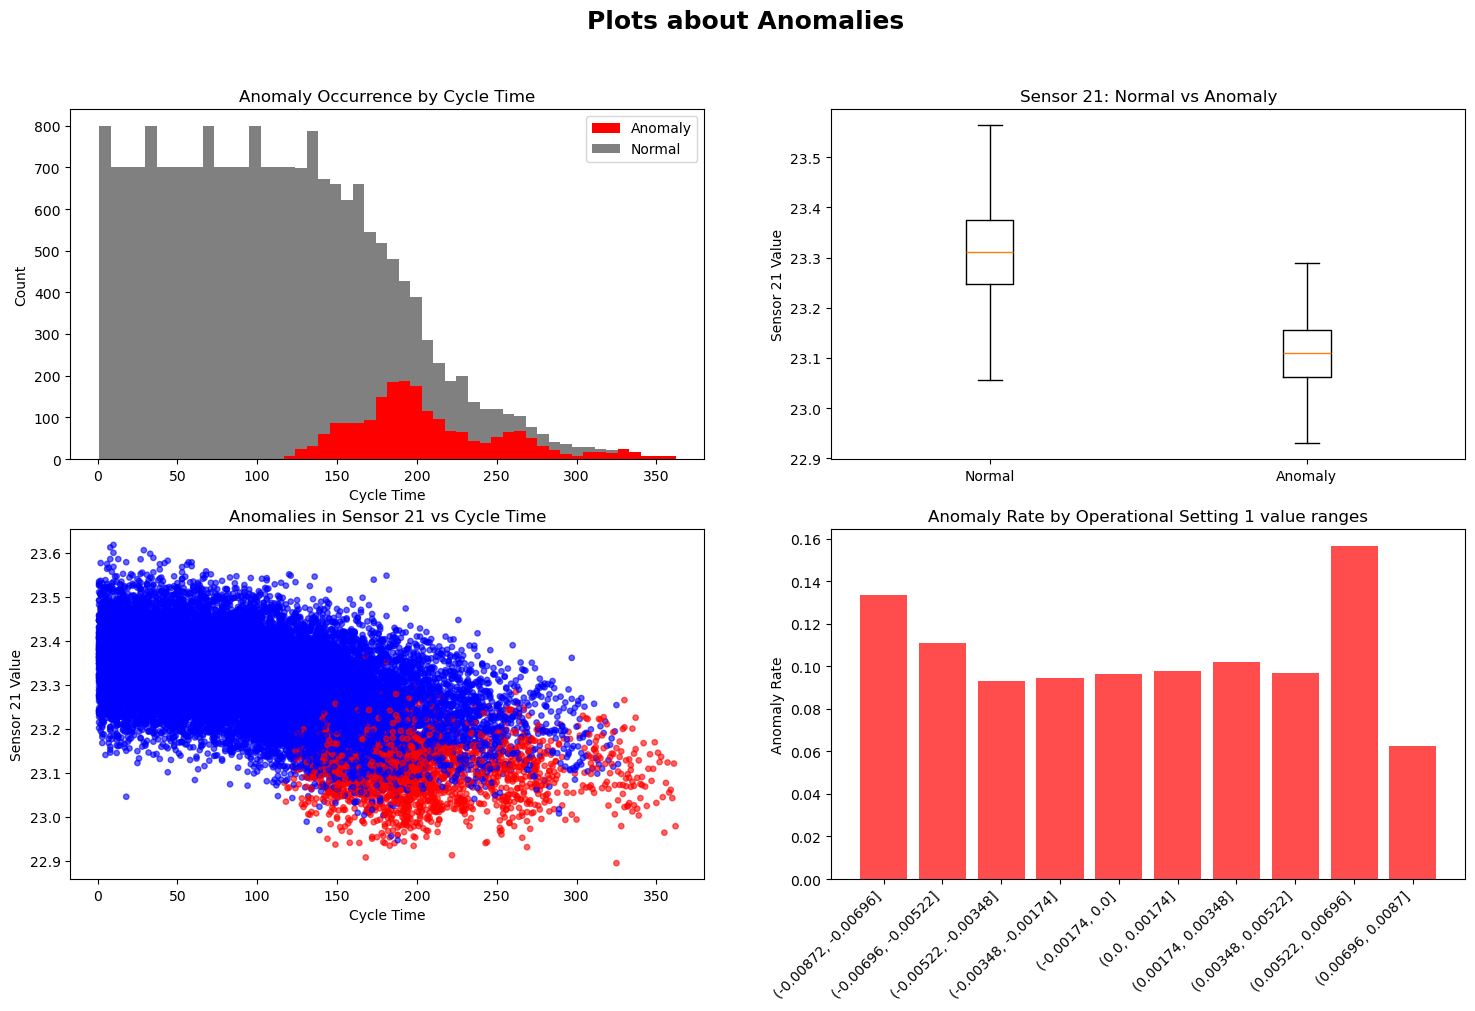

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle("Plots about Anomalies", fontsize=18, fontweight='bold')

# 1. Anomaly count by cycle time
axes[0,0].hist(
    [df[df['is_anomaly']]['cycle_time'], df[~df['is_anomaly']]['cycle_time']],
    bins=50, stacked=True, color=['red', 'grey'], label=['Anomaly', 'Normal']
)
axes[0,0].set_title("Anomaly Occurrence by Cycle Time")
axes[0,0].set_xlabel("Cycle Time")
axes[0,0].set_ylabel("Count")
axes[0,0].legend()

# 2. Sensor measurement distribution (choose a sensor, e.g., 21)
axes[0,1].boxplot(
    [df[df['is_anomaly']==False]['sensor_measurement_21'],
     df[df['is_anomaly']==True]['sensor_measurement_21']],
    labels=['Normal', 'Anomaly'],
    showfliers=False
)
axes[0,1].set_title("Sensor 21: Normal vs Anomaly")
axes[0,1].set_ylabel("Sensor 21 Value")

# 3. Average sensor measurement per engine, color by anomaly presence
sc = axes[1,0].scatter(
    x=df['cycle_time'],
    y=df['sensor_measurement_21'],
    c=df['is_anomaly'].map({True: 'red', False: 'blue'}),
    alpha=0.6,
    s=15
)
axes[1,0].set_title('Anomalies in Sensor 21 vs Cycle Time')
axes[1,0].set_xlabel('Cycle Time')
axes[1,0].set_ylabel('Sensor 21 Value')


# 4. Operational setting 1: anomaly rate by value bin
df['op1_bin'] = pd.cut(df['operational_setting_1'], bins=10)
anomaly_rate = df.groupby('op1_bin')['is_anomaly'].mean()
axes[1,1].bar(anomaly_rate.index.astype(str), anomaly_rate.values, color='red', alpha=0.7)
axes[1,1].set_title("Anomaly Rate by Operational Setting 1 value ranges")
axes[1,1].set_ylabel("Anomaly Rate")
axes[1,1].tick_params(axis='x', rotation=45)
for label in axes[1, 1].get_xticklabels():
    label.set_horizontalalignment('right')

plt.show()